In [0]:
from math import sqrt,sin,cos
from numpy import array
from numpy import linspace,zeros,float64
import numpy as np
from tqdm import tqdm_notebook as tqdm
from copy import deepcopy

import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
#pertrubation

def st_X(x,y):
    p00 =    -0.01311
    p10 =    0.009422 
    p01 =     -0.0276
    p20 =      0.1476
    p11 =    -0.04613
    p02 =      0.2377
    p30 =     -0.1103
    p21 =     -0.2451
    p12 =      0.1946
    p03 =     -0.4666
    p40 =     -0.1914
    p31 =     0.06507
    p22 =      0.4069
    p13 =     -0.2008
    p04 =      0.3505
    p50 =     0.07237
    p41 =     0.04237
    p32 =    -0.01276
    p23 =     -0.1806
    p14 =     0.05798
    p05 =    -0.09046
    return p00 + p10*x + p01*y + p20*x**2 + p11*x*y + p02*y**2 + p30*x**3 + p21*x**2*y + p12*x*y**2 + p03*y**3 + p40*x**4 + p31*x**3*y + p22*x**2*y**2 + p13*x*y**3 + p04*y**4 + p50*x**5 + p41*x**4*y + p32*x**3*y**2 + p23*x**2*y**3 + p14*x*y**4 + p05*y**5

def st_Y(x,y):
    p00 =     0.04728
    p10 =    -0.03281
    p01 =     -0.4472
    p20 =    -0.09362
    p11 =       0.397
    p02 =       1.532
    p30 =    -0.02768
    p21 =      0.4174
    p12 =      -1.004
    p03 =      -2.566
    p40 =     0.06433
    p31 =      0.1234
    p22 =     -0.5461
    p13 =      0.8732
    p04 =       1.959
    p50 =    0.001958
    p41 =    -0.06374
    p32 =    -0.09306  
    p23 =      0.2182
    p14 =     -0.2402
    p05 =     -0.5396
    return p00 + p10*x + p01*y + p20*x**2 + p11*x*y + p02*y**2 + p30*x**3 + p21*x**2*y + p12*x*y**2 + p03*y**3 + p40*x**4 + p31*x**3*y + p22*x**2*y**2 + p13*x*y**3 + p04*y**4 + p50*x**5 + p41*x**4*y + p32*x**3*y**2 + p23*x**2*y**3 + p14*x*y**4 + p05*y**5

# def st_E(x,y):
#     p00 =     0.02539
#     p10 =    -0.02509
#     p01 =     -0.2097
#     p20 =   -0.004579
#     p11 =      0.1277
#     p02 =      0.6871
#     p30 =     0.05808
#     p21 =    0.000537
#     p12 =      -0.263
#     p03 =      -1.038
#     p40 =   -0.003919
#     p31 =    -0.05393
#     p22 =     0.01495
#     p13 =       0.217
#     p04 =      0.7162
#     p50 =    -0.04783
#     p41 =   -0.008534
#     p32 =      0.0334
#     p23 =   -0.003816
#     p14 =    -0.06425
#     p05 =     -0.1833
#     return p00 + p10*x + p01*y + p20*x**2 + p11*x*y + p02*y**2 + p30*x**3 +p21*x**2*y + p12*x*y**2 + p03*y**3 + p40*x**4 + p31*x**3*y + p22*x**2*y**2 + p13*x*y**3 + p04*y**4 + p50*x**5 + p41*x**4*y + p32*x**3*y**2 + p23*x**2*y**3 + p14*x*y**4 + p05*y**5

In [0]:
#simple trajectory
def circle(t):
    x = 0.4*sin(-0.02*t)
    y = 0.4*cos(-0.02*t)+0.9
    vx = 0.4*0.02*cos(-0.02*t)
    vy = -0.4*0.02*sin(-0.02*t)
    return [x, y, vx, vy]

In [0]:
def Lyapunov_control(x, y, vx, vy, wanted_x, wanted_y, wanted_vx, wanted_vy, param):
    """
    param["k1"], param["k2"]: linear coefs
    """
    k1, k2 = param["k1"], param["k2"]
    ax = -k1*(x - wanted_x)-k2*(vx + wanted_vx)
    ay = -k1*(y - wanted_y)-k2*(vy + wanted_vy)
    return [ax, ay]

In [0]:
MAX_ACC = 0.36538
def motion(t, listState, trajectory, control, control_param):
    [x, y, vx, vy] = listState;

    if (x < -0.82)and(vx < 0):
        vx = 0
    if (x > 0.82)and(vx > 0):
        vx = 0    
    if (y < 0)and(vy < 0):
        vy = 0
    if (y > 1.61)and(vy > 0):
        vy = 0
    
    wanted_x, wanted_y, wanted_vx, wanted_vy = trajectory(t)
    ax0, ay0 = control(x, y, vx, vy, wanted_x, wanted_y, wanted_vx, wanted_vy, param = control_param)
    
    u = st_X(x,y)
    v = st_Y(x,y)
    
    if ax0**2 + ay0**2 > MAX_ACC*2:
        [ax, ay] = [MAX_ACC*ax0/sqrt(ax0**2 + ay0**2)+u, MAX_ACC*ay0/sqrt(ax0**2 + ay0**2)+v]
    else:
        [ax, ay] = [ax0+u, ay0+v]
        
    return array([vx, vy, ax, ay]), array([ax0, ay0])

In [0]:
def motion_without_perp(t , listState, trajectory, control, control_param):
    [x, y, vx, vy] = listState;

    if (x < -0.82)and(vx < 0):
        vx = 0
    if (x > 0.82)and(vx > 0):
        vx = 0    
    if (y < 0)and(vy < 0):
        vy = 0
    if (y > 1.61)and(vy > 0):
        vy = 0
    
    wanted_x, wanted_y, wanted_vx, wanted_vy = trajectory(t)
    ax0, ay0 = control(x, y, vx, vy, wanted_x, wanted_y, wanted_vx, wanted_vy, param = control_param)
    
    u = 0
    v = 0
    
    if ax0**2 + ay0**2 > 0.36538**2:
        [ax, ay] = [0.36538*ax0/sqrt(ax0**2 + ay0**2)+u, 0.36538*ay0/sqrt(ax0**2 + ay0**2)+v]
    else:
        [ax, ay] = [ax0+u, ay0+v]
        
    return array([vx, vy, ax, ay]), array([ax0, ay0])

In [0]:
def ode4(ode, tspan, y0, k, trajectory, control, control_param):
    [t0, tf] = tspan
    h=(tf-t0)/k
    T = linspace(t0,tf,num = k+1, dtype = np.double)
    nrowsT = len(T)
    nrowsy0 = len(y0)
    Y = zeros((nrowsT,nrowsy0),dtype = np.double)
    acc = zeros((nrowsT, 2))
    
    Y[0][:] = y0[:]
    for i in range(1,nrowsT,1):
        t  = T[i-1]
        y  = Y[i-1][:]
        h  = T[i] - T[i-1]
        k1, acc[i-1, :] = ode(t,y,trajectory,control, control_param)
        k2, _ = ode(t+0.5*h,y+0.5*h*k1,trajectory,control, control_param)
        k3, _ = ode(t+h/2.0,y+0.5*h*k2,trajectory,control, control_param)
        k4, _ = ode(t+h,y+h*k3,trajectory,control, control_param)
        yn = y+(1.0/6.0)*h*(k1+2.0*k2+2.0*k3+k4)
        Y[i][:] = yn
    return [T, Y, acc]

In [0]:
DotQuan = 1800
Time = 900
h = Time/DotQuan

tm = [0, Time]
y0 = array([-0.5, 1.2, 0.0, 0.0])
K = {"k1": 0.12, "k2": 0.68}

_, y_lyap, acc_lyap = ode4(motion,tm,y0,DotQuan,circle, Lyapunov_control, K)
yid = np.array([circle(t) for t in np.linspace(0, Time, DotQuan+1)])

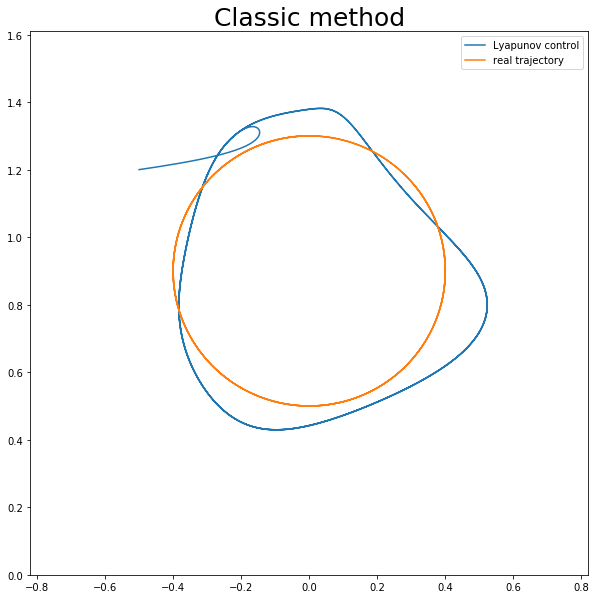

In [9]:
plt.figure(figsize = (10, 10))
plt.title("Classic method", fontsize = 25)
plt.plot(y_lyap[:,0], y_lyap[:,1], label = "Lyapunov control")
plt.plot(yid[:,0], yid[:,1], label = "real trajectory")
plt.legend()
plt.xlim((-0.82, 0.82))
plt.ylim((0, 1.61))
plt.show()

In [10]:
loss_lyap = np.linalg.norm(yid - y_lyap, 'fro')
print("Loss of Lyapunov control:", loss_lyap)

Loss of Lyapunov control: 5.1463446774357084


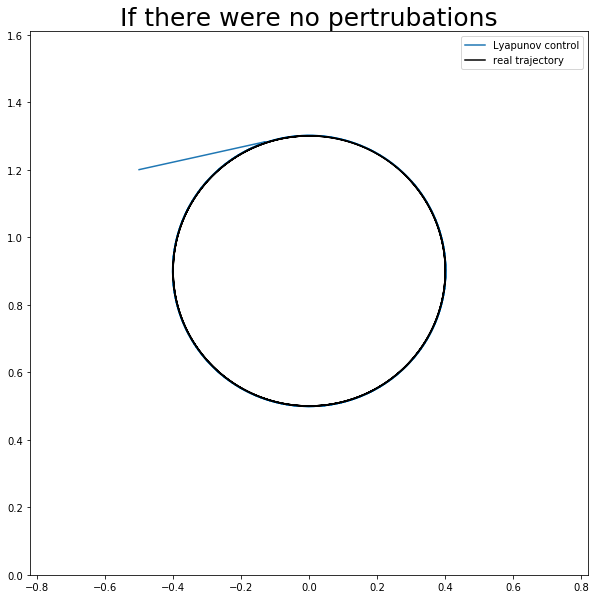

In [11]:
[T, y_perf, _] = ode4(motion_without_perp,tm,y0,DotQuan,circle, Lyapunov_control, K);
plt.figure(figsize = (10, 10))
plt.title("If there were no pertrubations", fontsize = 25)
plt.plot(y_perf[:,0], y_perf[:,1], label = "Lyapunov control")
plt.plot(yid[:,0], yid[:,1], color = "black", label = "real trajectory")
plt.legend()
plt.xlim((-0.82, 0.82))
plt.ylim((0, 1.61))
plt.show()

In [12]:
loss_perf = np.linalg.norm(yid - y_perf, 'fro')
print("Loss of Lyapunov control if world was perfect:", loss_perf)

Loss of Lyapunov control if world was perfect: 1.5487458019264304


# Pretraining

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [14]:
if torch.cuda.is_available():
    use_gpu = True
    print("Using GPU")
else:
    use_gpu = False
FloatTensor = torch.cuda.FloatTensor if use_gpu else torch.FloatTensor
DoubleTensor = torch.cuda.DoubleTensor if use_gpu else torch.DoubleTensor
LongTensor = torch.cuda.LongTensor if use_gpu else torch.LongTensor
ByteTensor = torch.cuda.ByteTensor if use_gpu else torch.ByteTensor
Tensor = DoubleTensor

Using GPU


In [0]:
model = nn.Sequential(
        nn.Linear(8, 64),
        nn.Sigmoid(),
    
        nn.Linear(64, 16),
        nn.Sigmoid(),
    
        nn.Linear(16, 2),


).type(Tensor)

# model = nn.Linear(8, 2)
if use_gpu:
    model.cuda()

In [0]:
def loss_pretrain(target, predicted):
    return ((target - predicted)**2).sum()

In [0]:
DotQuan = 1800
Time = 900

tm = [0, Time]
y0 = array([-0.5, 1.2, 0.0, 0.0])
K = {"k1": 0.12, "k2": 0.68}

def get_batches_pretrain(trajectory, batch_size, batch_num):
    for n_batch in range(batch_num):
        inp = np.random.rand(batch_size, 8)*1.6 - np.array([0.8, 0, 0.8, 0.8, 0.8, 0, 0.8, 0.8])
        out = np.array([Lyapunov_control(*x, K) for x in inp])
        
        if use_gpu:
            inp, out = Tensor(inp).cuda(), Tensor(out).cuda()
        else:
            inp, out = Tensor(inp), Tensor(out)
        yield inp, out

In [0]:
n_epochs = 60
batch_size = 32
batch_num = 1
opt = torch.optim.Adam(model.parameters(), 2e-4)

def pretraining(model, optimizer, n_epochs = n_epochs, batch_size = batch_size, batch_num = batch_num):
    model.train(True)
    for epoch in tqdm(range(n_epochs)):
        for x, y in get_batches_pretrain(circle, batch_size, batch_num):
            optimizer.zero_grad()
            y_pred = model(x)
            loss = loss_pretrain(y, y_pred)
            loss.backward()
            optimizer.step()
    return model 

In [19]:
pretrained_model = pretraining(model, opt, 10000, 256, 1);

In [0]:
def deep_control(*state, param):
    """
    param["model"]: trained neural net
    param["var"]: variance of normal noize with shape (2,)
    do not define this keyword if you want to get unnoized result
    """
    state_t = Tensor(np.array(state)).cuda().view(1, -1)
    res = param["model"](state_t)
    res = res.cpu().data.numpy()[0]
    if "var" in param.keys():
        res += np.random.normal(scale = param["var"], size = 2)
    elif "add" in param.keys():
        res += next(param["add"])
    return res

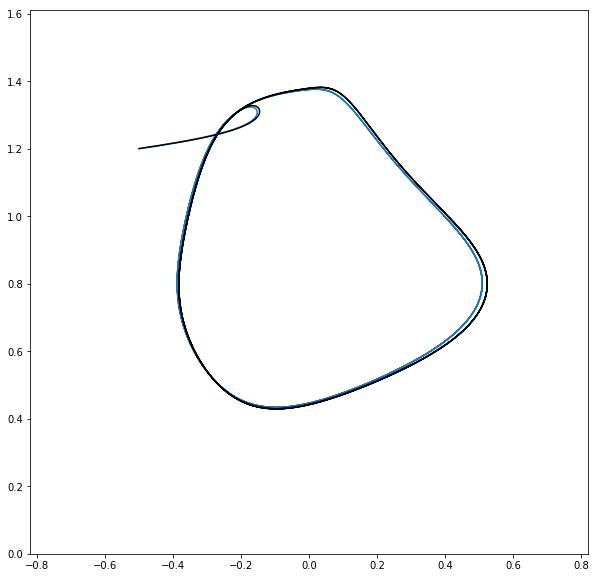

In [21]:
pretrained_model.eval()
[T, y_pre, _] = ode4(motion,tm,y0,DotQuan,circle, deep_control, {"model": pretrained_model});
plt.figure(figsize = (10, 10))
plt.plot(y_pre[:,0], y_pre[:,1])
plt.plot(y_lyap[:,0], y_lyap[:,1], color = "black")
plt.xlim((-0.82, 0.82))
plt.ylim((0, 1.61))
plt.show()

In [22]:
loss_pre = np.linalg.norm(yid - y_pre, 'fro')
print("Loss of pretrained neural net:", loss_pre)

Loss of pretrained neural net: 4.911214812926376


# Method: Crossentropy on states

In [0]:
from IPython import display

In [0]:
DotQuan = 1800
Time = 900
h = Time/DotQuan

In [0]:
def loss_weighted(path1, path2, w):
    if len(path1.shape) == 2:
        x = np.linalg.norm(path1[:, :2] - path2[:, :2], 'fro')*w[0]
        y = np.linalg.norm(path1[:, 2:] - path2[:, 2:], 'fro')*w[1]
    else:
        x = np.linalg.norm(path1[:2] - path2[:2])*w[0]
        y = np.linalg.norm(path1[2:] - path2[2:])*w[1]    
    return np.sqrt(x**2 + y**2)

def simple_control(x, y, vx, vy, wanted_x, wanted_y, wanted_vx, wanted_vy, param):
    return np.array(param["answer"])

In [26]:
n_traj = 100
n_vic = 100
times = np.linspace(0, Time, n_traj)
dxs = np.random.normal(scale = [0.2, 0.2, 0.01, 0.01], size = (n_vic, 4))
dataset = np.zeros((n_traj*n_vic, 10))

for i in tqdm(range(n_traj)):
    for j in range(n_vic):
        num = n_vic*i + j
        t = times[i]
        dx = dxs[j]
        dataset[num, :4] = circle(t)+dx
        dataset[num, 4:8] = circle(t)
        dataset[num, 8:] = np.array(Lyapunov_control(*dataset[num, :8], K))
        _, y, _ = ode4(motion, [t, t+h], dataset[num, :4] , 1, circle, Lyapunov_control, K)
        bestloss = loss_weighted(y[1], circle(t + h), [1, 1])
    #     a = np.random.normal(loc = dataset[num, 8:], scale = 0.2, size = (100, 2))
        a = np.random.normal(loc = dataset[num, 8:], scale = 0.4, size = (100, 2))


        for k in range(100):
          _, y, _ = ode4(motion, [t, t+h], dataset[num, :4] , 1, circle, simple_control, {"answer": a[k]})
          if loss_weighted(y[1], circle(t + h), [1, 0.2]) < bestloss:
            bestloss = loss_weighted(y[1], circle(t + h), [1, 1])
            dataset[num, 8:10] = a[k] 


In [0]:
def get_batches_crossentropy_states(data, batch_size):
    np.random.shuffle(data)

    n_batches = data.shape[0] // batch_size
    if data.shape[0] % batch_size != 0:
        n_batches += 1
    for i in range(n_batches):
        start = i*batch_size
        end = min((i+1)*batch_size, data.shape[0])
        inp = data[start:end, :8]
        out = data[start:end, 8:]


        if use_gpu:
            inp, out = Tensor(inp).cuda(), Tensor(out).cuda()
        else:
            inp, out = Tensor(inp), Tensor(out)
        yield inp, out

In [28]:
_, y_pre, _ = ode4(motion, [0, Time], y0, DotQuan, circle, deep_control, {"model": pretrained_model});
# print(np.linalg.norm(y_pre - yid))
print("Loss after pretraining:", loss_weighted(y_pre, yid, [1, 1]))

Loss after pretraining: 4.911214812926375


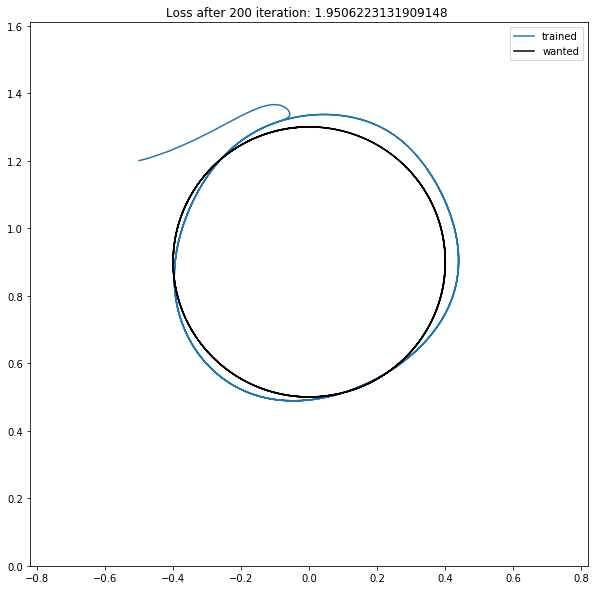

In [29]:
n_epochs = 200
final_model = pretrained_model
opt = torch.optim.Adam(final_model.parameters(), 1e-4)

for epoch in tqdm(range(1, n_epochs + 1)):
    for x, y in get_batches_crossentropy_states(dataset, 64):
        opt.zero_grad()
        y_pred = final_model(x)
        loss = loss_pretrain(y, y_pred)
        loss.backward()
        opt.step()
    _, y, _ = ode4(motion, [0, Time], y0, DotQuan, circle, deep_control, {"model": final_model});

    display.clear_output(wait=True)
    plt.figure(figsize = (10, 10))
    plt.title("Loss after {0} iteration: {1} ".format(epoch, np.linalg.norm(y - yid)))

    plt.plot(y[:,0], y[:,1], label = "trained")
    plt.plot(yid[:,0], yid[:,1], color = "black", label = "wanted")
    plt.legend()
    plt.xlim((-0.82, 0.82))
    plt.ylim((0, 1.61))
    plt.show()

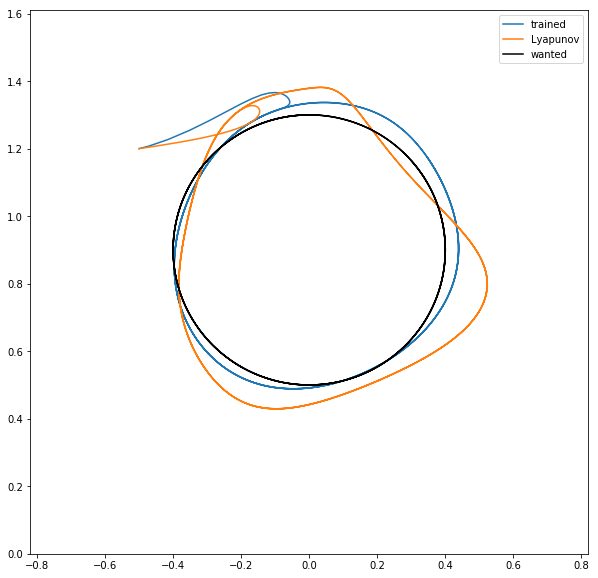

In [30]:
_, y, _ = ode4(motion, [0, Time], y0, DotQuan, circle, deep_control, {"model": final_model});
plt.figure(figsize = (10, 10))

plt.plot(y[:,0], y[:,1], label = "trained")
plt.plot(y_lyap[:,0], y_lyap[:,1], label = "Lyapunov")
plt.plot(yid[:,0], yid[:,1], color = "black", label = "wanted")
plt.legend()
plt.xlim((-0.82, 0.82))
plt.ylim((0, 1.61))
plt.show()

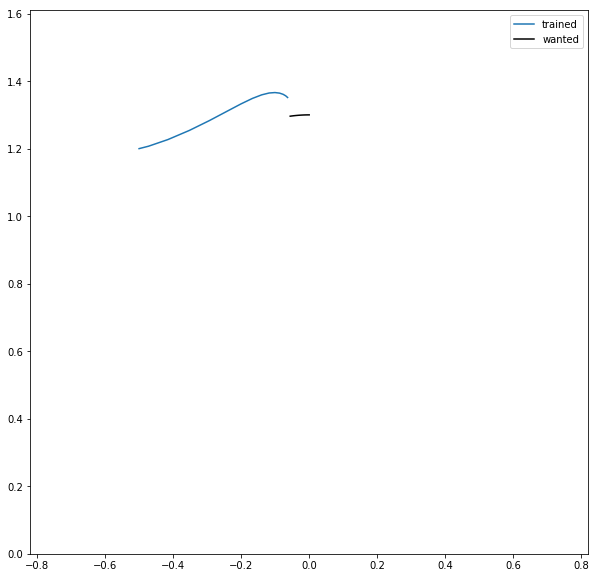

In [31]:
n = 15
plt.figure(figsize = (10, 10))

plt.plot(y[:n,0], y[:n,1], label = "trained")
plt.plot(yid[:n,0], yid[:n,1], color = "black", label = "wanted")

plt.legend()
plt.xlim((-0.82, 0.82))
plt.ylim((0, 1.61))
plt.show()

# MCTS part

In [0]:
class Node:
    """ a tree node for MCTS """

    # metadata:
    parent = None  # parent Node'
    value_sum = 0.  # sum of state values from all visits (numerator)
    times_visited = 0  # counter of visits (denominator)

    def __init__(self, parent, action):
        """
        Creates and empty node with no children.
        Does so by commiting an action and recording outcome.

        :param parent: parent Node
        :param action: action to commit from parent Node

        """

        self.parent = parent
        self.action = action
        #self.cur_coord = cur_coord
        if parent is None: 
          self.level = 0
        else:
          self.level = parent.level+1
        self.children = set()  # set of child nodes

        # get action outcome and save it
        if self.level == 0:
          cur_coord = np.array([-0.5, 1.2, 0.0, 0.0])
        else:
          _, y, _ = ode4(motion, [self.level/2 - 0.5, self.level/2], self.parent.cur_coord , 1, circle, simple_control, {"answer": self.action})
          cur_coord = y[1]
        self.cur_coord = cur_coord
        self.immediate_reward = -np.linalg.norm(cur_coord - circle(self.level/2))**2
        self.is_done = False
        if self.level == 1801: 
          self.is_done = True
        

    def is_leaf(self):
        return len(self.children) == 0

    def is_root(self):
        return self.parent is None

    def get_mean_value(self):
        return self.value_sum / self.times_visited if self.times_visited != 0 else -np.inf

    def ucb_score(self, scale=10, max_value=1e100):
        """
        Computes ucb1 upper bound using current value and visit counts for node and it's parent.

        :param scale: Multiplies upper bound by that. From hoeffding inequality, assumes reward range to be [0,scale].
        :param max_value: a value that represents infinity (for unvisited nodes)

        """

        if self.times_visited == 0:
            return max_value

        # compute ucb-1 additive component (to be added to mean value)
        # hint: you can use self.parent.times_visited for N times node was considered,
        # and self.times_visited for n times it was visited
        Nsa = self.times_visited
        Ns = self.parent.times_visited

        U = np.sqrt(2*np.log(Ns)/Nsa)

        return self.get_mean_value() + scale*U

    # MCTS steps

    def select_best_leaf(self):
        """
        Picks the leaf with highest priority to expand
        Does so by recursively picking nodes with best UCB-1 score until it reaches the leaf.

        """
        if self.is_leaf():
            return self

        children = self.children

        best_child = sorted(children, key = lambda x: x.ucb_score(), reverse = True)[0]

        return best_child.select_best_leaf()

    def expand(self):
        """
        Expands the current node by creating all possible child nodes.
        Then returns one of those children.
        """

        assert not self.is_done, "can't expand from terminal state"
        #generating new action by nn and adding a noise;
        nn_act = deep_control(*self.cur_coord, *circle(self.level/2), param = {"model": final_model})
        for i in range(10):
            action = nn_act + np.random.normal(0.004, 0.01, 2)
            self.children.add(Node(self, action))

        return self.select_best_leaf()

    def rollout(self):
        
                       
        _, y, _ = ode4(motion, [self.level/2, 900], self.cur_coord, 1800-self.level, circle, deep_control, {"model": final_model}) 
        rollout_reward = -(np.linalg.norm(y - yid[self.level:]))**2

        return rollout_reward

    def propagate(self, child_value):
        """
        Uses child value (sum of rewards) to update parents recursively.
        """
        # compute node value
        my_value = self.immediate_reward + child_value

        # update value_sum and times_visited
        self.value_sum += my_value
        self.times_visited += 1

        # propagate upwards
        if not self.is_root():
            self.parent.propagate(my_value)

    def safe_delete(self):
        """safe delete to prevent memory leak in some python versions"""
        del self.parent
        for child in self.children:
            child.safe_delete()
            del child

In [0]:
def plan_mcts(root, n_iters=10):
    """
    builds tree with monte-carlo tree search for n_iters iterations
    :param root: tree node to plan from
    :param n_iters: how many select-expand-simulate-propagete loops to make
    """
    for _ in range(n_iters):

        node = root.select_best_leaf()

        if node.is_done:
            node.propagate(0)

        else:  # node is not terminal
            if len(node.children)==0:
              child = node.expand()
            else: 
              child = max(node.children, key = Node.get_mean_value)
            reward = child.rollout()
            child.propagate(reward)

In [0]:
root = Node(None, None)

In [0]:
plan_mcts(root, n_iters=100)

In [41]:
total_reward = 0  # sum of rewards
from itertools import count
l = 0
coordinates = []

for i in count():

    # get best child
    best_child = max(root.children, key = Node.get_mean_value)

    # take action
    r = -np.linalg.norm(best_child.cur_coord - circle(l/2))**2
    
    l+=1
    total_reward += r
    if l==1801:
        print("Finished with reward = ", total_reward)
        break

    # discard unrealized part of the tree [because not every child matters :(]
    for child in root.children:
        if child != best_child:
            child.safe_delete()

    # declare best child a new root
    root = best_child
    coordinates.append(root.cur_coord)

    
    plan_mcts(root, n_iters=3)

RecursionError: ignored

In [42]:
total_reward

-269.63881262386406

In [46]:
loss = np.sqrt(-total_reward)
print(loss)

16.42068246522854


In [0]:
coord = np.array(coordinates)

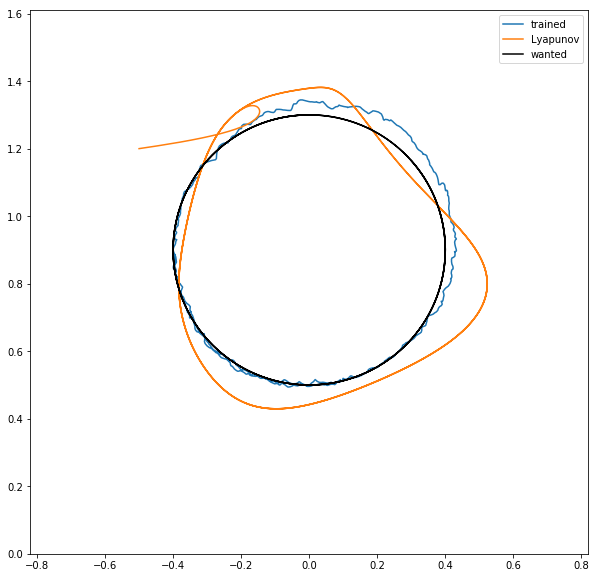

In [45]:
plt.figure(figsize = (10, 10))

plt.plot(coord[:,0], coord[:,1], label = "trained")
plt.plot(y_lyap[:,0], y_lyap[:,1], label = "Lyapunov")
plt.plot(yid[:,0], yid[:,1], color = "black", label = "wanted")
plt.legend()
plt.xlim((-0.82, 0.82))
plt.ylim((0, 1.61))
plt.show()